In [1]:
#import packages
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load data
data = pd.read_csv('../data/qbs.csv')

data.head()

,transfer,season,player_playerId,player_firstName,player_lastName,player_position,player_teamId,player_teamName,player_height,player_weight,...,stats_passing_interceptions,stats_passing_pct,stats_rushing_ypc,stats_rushing_touchdowns,stats_rushing_carries,stats_rushing_yards,stats_rushing_long,stats_fumbles_fumbles,stats_fumbles_recovered,stats_fumbles_lost
0,0,2021,4875287,A.J.,Abbott,QB,2483,Oregon,74.0,233.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2016,-1039931,A.J.,Cecil,QB,254,Utah,73.0,195.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,2017,545682,A.J.,Erdely,QB,5,UAB,76.0,220.0,...,4.0,0.607,0.0,13.0,122.0,320.0,41.0,6.0,0.0,2.0
3,0,2018,545682,A.J.,Erdely,QB,5,UAB,76.0,220.0,...,7.0,0.563,0.0,5.0,84.0,257.0,38.0,2.0,0.0,0.0
4,0,2019,4429716,A.J.,Gucciardo,QB,2649,Toledo,73.0,185.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# break down by power 5 vs group of 5
power_5 = ['SEC', 'ACC', 'Big 12', 'Big Ten', 'Pac-12']

# create boolean mask for power 5 conferences
power_5_mask = data['team_conference'].isin(power_5)

# filter data using the mask
power_5_transfers = data[power_5_mask]
group_of_5_transfers = data[~power_5_mask]

#move player_teamName to front
power_5_transfers = power_5_transfers[ ['player_teamName'] + [ col for col in power_5_transfers.columns if col != 'player_teamName' ] ]

#limit to where transfer = 1
power_5_transfers = power_5_transfers[power_5_transfers['transfer'] == 1]

#move player_teamName to front
group_of_5_transfers = group_of_5_transfers[ ['player_teamName'] + [ col for col in group_of_5_transfers.columns if col != 'player_teamName' ] ]

#limit to where transfer = 1
group_of_5 = group_of_5_transfers[group_of_5_transfers['transfer'] == 1]

#TEMP: limit to 2023
power_5_transfers = power_5_transfers[power_5_transfers['season'] == 2023]
group_of_5_transfers = group_of_5_transfers[group_of_5_transfers['season'] == 2023]

#print num rows for both
print(power_5_transfers.shape[0])
print(group_of_5_transfers.shape[0])


77
360


In [4]:
# Filter columns with stats_ prefix
stats = data.filter(like='stats_')

# Calculate statistics for transfer == 0
stats_0_mean = stats[data['transfer'] == 0].mean()
stats_0_median = stats[data['transfer'] == 0].median()
stats_0_std = stats[data['transfer'] == 0].std()
stats_0_min = stats[data['transfer'] == 0].min()
stats_0_max = stats[data['transfer'] == 0].max()

# Calculate statistics for transfer == 1
stats_1_mean = stats[data['transfer'] == 1].mean()
stats_1_median = stats[data['transfer'] == 1].median()
stats_1_std = stats[data['transfer'] == 1].std()
stats_1_min = stats[data['transfer'] == 1].min()
stats_1_max = stats[data['transfer'] == 1].max()

# Create a new DataFrame with these statistics
stats_diff = pd.DataFrame({
    'did not transfer mean': stats_0_mean,
    'did transfer mean': stats_1_mean,
    'did not transfer std': stats_0_std,
    'did transfer std': stats_1_std,
    'did not transfer min': stats_0_min,
    'did transfer min': stats_1_min,
    'did not transfer max': stats_0_max,
    'did transfer max': stats_1_max
})

# Calculate the difference between the two groups for each statistic
stats_diff['mean diff'] = stats_diff['did transfer mean'] - stats_diff['did not transfer mean']
stats_diff['std diff'] = stats_diff['did transfer std'] - stats_diff['did not transfer std']
stats_diff['min diff'] = stats_diff['did transfer min'] - stats_diff['did not transfer min']
stats_diff['max diff'] = stats_diff['did transfer max'] - stats_diff['did not transfer max']

# Sort by the mean difference
stats_diff = stats_diff.sort_values('mean diff', ascending=False)


#sort by largest mean difference
stats_diff = stats_diff.sort_values('mean diff', ascending=False)

#move mean diff column to front
stats_diff = stats_diff[ ['mean diff'] + [ col for col in stats_diff.columns if col != 'mean diff' ] ]


# Display the top 20 rows
stats_diff.head(20)

,mean diff,did not transfer mean,did transfer mean,did not transfer std,did transfer std,did not transfer min,did transfer min,did not transfer max,did transfer max,std diff,min diff,max diff
stats_passing_attempts,1.121095,49.183990,50.305085,111.668352,100.141095,0.0,0.0,689.0,480.0,-11.527257,0.0,-209.0
stats_passing_completions,0.677894,29.770317,30.448211,69.583248,61.230670,0.0,0.0,505.0,295.0,-8.352578,0.0,-210.0
stats_rushing_long,0.590988,8.000349,8.591337,15.771402,14.961102,0.0,0.0,99.0,88.0,-0.810301,0.0,-11.0
stats_passing_interceptions,0.194042,1.257935,1.451977,2.844830,2.992294,0.0,0.0,21.0,15.0,0.147463,0.0,-6.0
stats_passing_pct,0.066956,0.199537,0.266493,0.293557,0.317450,0.0,0.0,1.0,1.0,0.023894,0.0,0.0
stats_rushing_ypc,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
stats_fumbles_recovered,-0.001605,0.003488,0.001883,0.061849,0.043396,0.0,0.0,2.0,1.0,-0.018452,0.0,-1.0
stats_fumbles_lost,-0.012186,0.356819,0.344633,0.929763,0.819494,0.0,0.0,9.0,6.0,-0.110269,0.0,-3.0
stats_fumbles_fumbles,-0.039411,0.768225,0.728814,1.793790,1.514053,0.0,0.0,14.0,9.0,-0.279737,0.0,-5.0
stats_rushing_touchdowns,-0.139003,0.690792,0.551789,2.066519,1.462310,0.0,0.0,25.0,13.0,-0.604209,0.0,-12.0


C:\Users\aj132\AppData\Local\Temp\ipykernel_27220\1954309436.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Season and Transfer', bbox_to_anchor=(1.05, 1), loc='upper left')


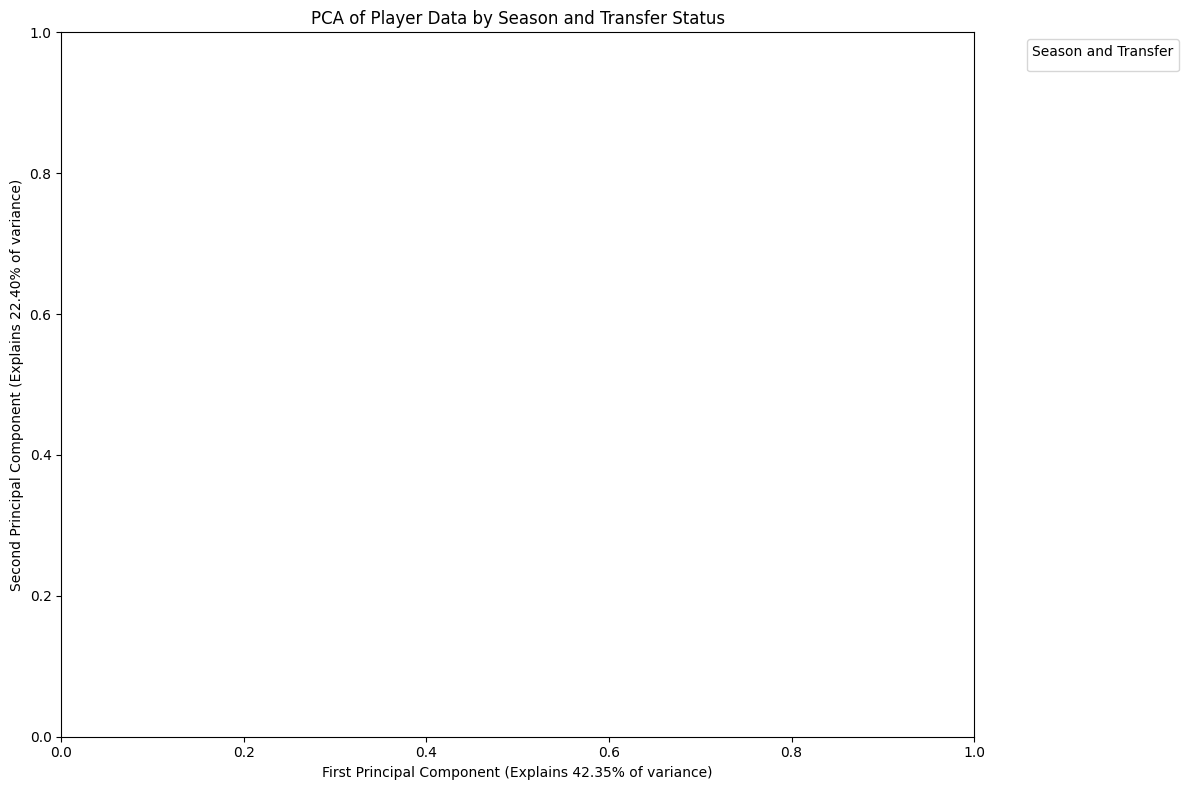

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
import numpy as np

# Function to preprocess the data
def preprocess_data(data, features):
    # Separate numerical and categorical features
    numerical_features = [f for f in features if f not in ["player_teamName", "team_conference", "team_coach"]]
    categorical_features = ["player_teamName", "team_conference", "team_coach"]
    
    # Scale numerical features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[numerical_features])
    
    # One-hot encode categorical features
    try:
        # For newer versions of scikit-learn
        encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
    except TypeError:
        # For older versions of scikit-learn
        encoder = OneHotEncoder(handle_unknown='ignore')
    encoded_data = encoder.fit_transform(data[categorical_features])
    
    # If encoded_data is sparse, convert to dense
    if hasattr(encoded_data, "toarray"):
        encoded_data = encoded_data.toarray()
    
    # Combine scaled numerical and encoded categorical data
    preprocessed_data = np.hstack((scaled_data, encoded_data))
    
    return preprocessed_data

# Function to perform PCA and create the plot
def pca_plot(data, features, seasons):
    # Preprocess the data
    preprocessed_data = preprocess_data(data, features)
    
    # Perform PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(preprocessed_data)
    
    # Create a DataFrame with PCA results
    pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
    pca_df['Season'] = data['season']
    pca_df['Transfer'] = data['transfer']
    
    # Plot
    plt.figure(figsize=(12, 8))
    for season in seasons:
        season_data = pca_df[pca_df['Season'] == season]
        sns.scatterplot(data=season_data, x='PC1', y='PC2', hue='Transfer', 
                        style='Transfer', label=season, alpha=0.7)
    
    plt.title('PCA of Player Data by Season and Transfer Status')
    plt.xlabel(f'First Principal Component (Explains {pca.explained_variance_ratio_[0]:.2%} of variance)')
    plt.ylabel(f'Second Principal Component (Explains {pca.explained_variance_ratio_[1]:.2%} of variance)')
    plt.legend(title='Season and Transfer', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

features = [
        "player_height",
        "player_weight",
        "player_class",
        "usage_passingDowns",
        "usage_standardDowns",
        "usage_thirdDown",
        "usage_secondDown",
        "usage_firstDown",
        "usage_rush",
        "usage_pass",
        "usage_overall",
        "stats_passing_attempts",
        "stats_passing_completions",
        "stats_passing_yards",
        "stats_passing_touchdowns",
        "stats_passing_interceptions",
        "stats_passing_pct",
        "stats_rushing_ypc",
        "stats_rushing_touchdowns",
        "stats_rushing_carries",
        "stats_rushing_yards",
        "stats_rushing_long",
        "stats_fumbles_fumbles",
        "stats_fumbles_lost",
        #EXPERIMENTAL: will need one-hot encoding
        "player_teamName",
        "team_conference",
        "team_coach",
    ]

#make copy of data
data_copy = data.copy()

#drop any rows with null values in any column
data_copy.dropna(inplace=True)

seasons = ['2018', '2019', '2020', '2021']
pca_plot(data_copy, features, seasons)

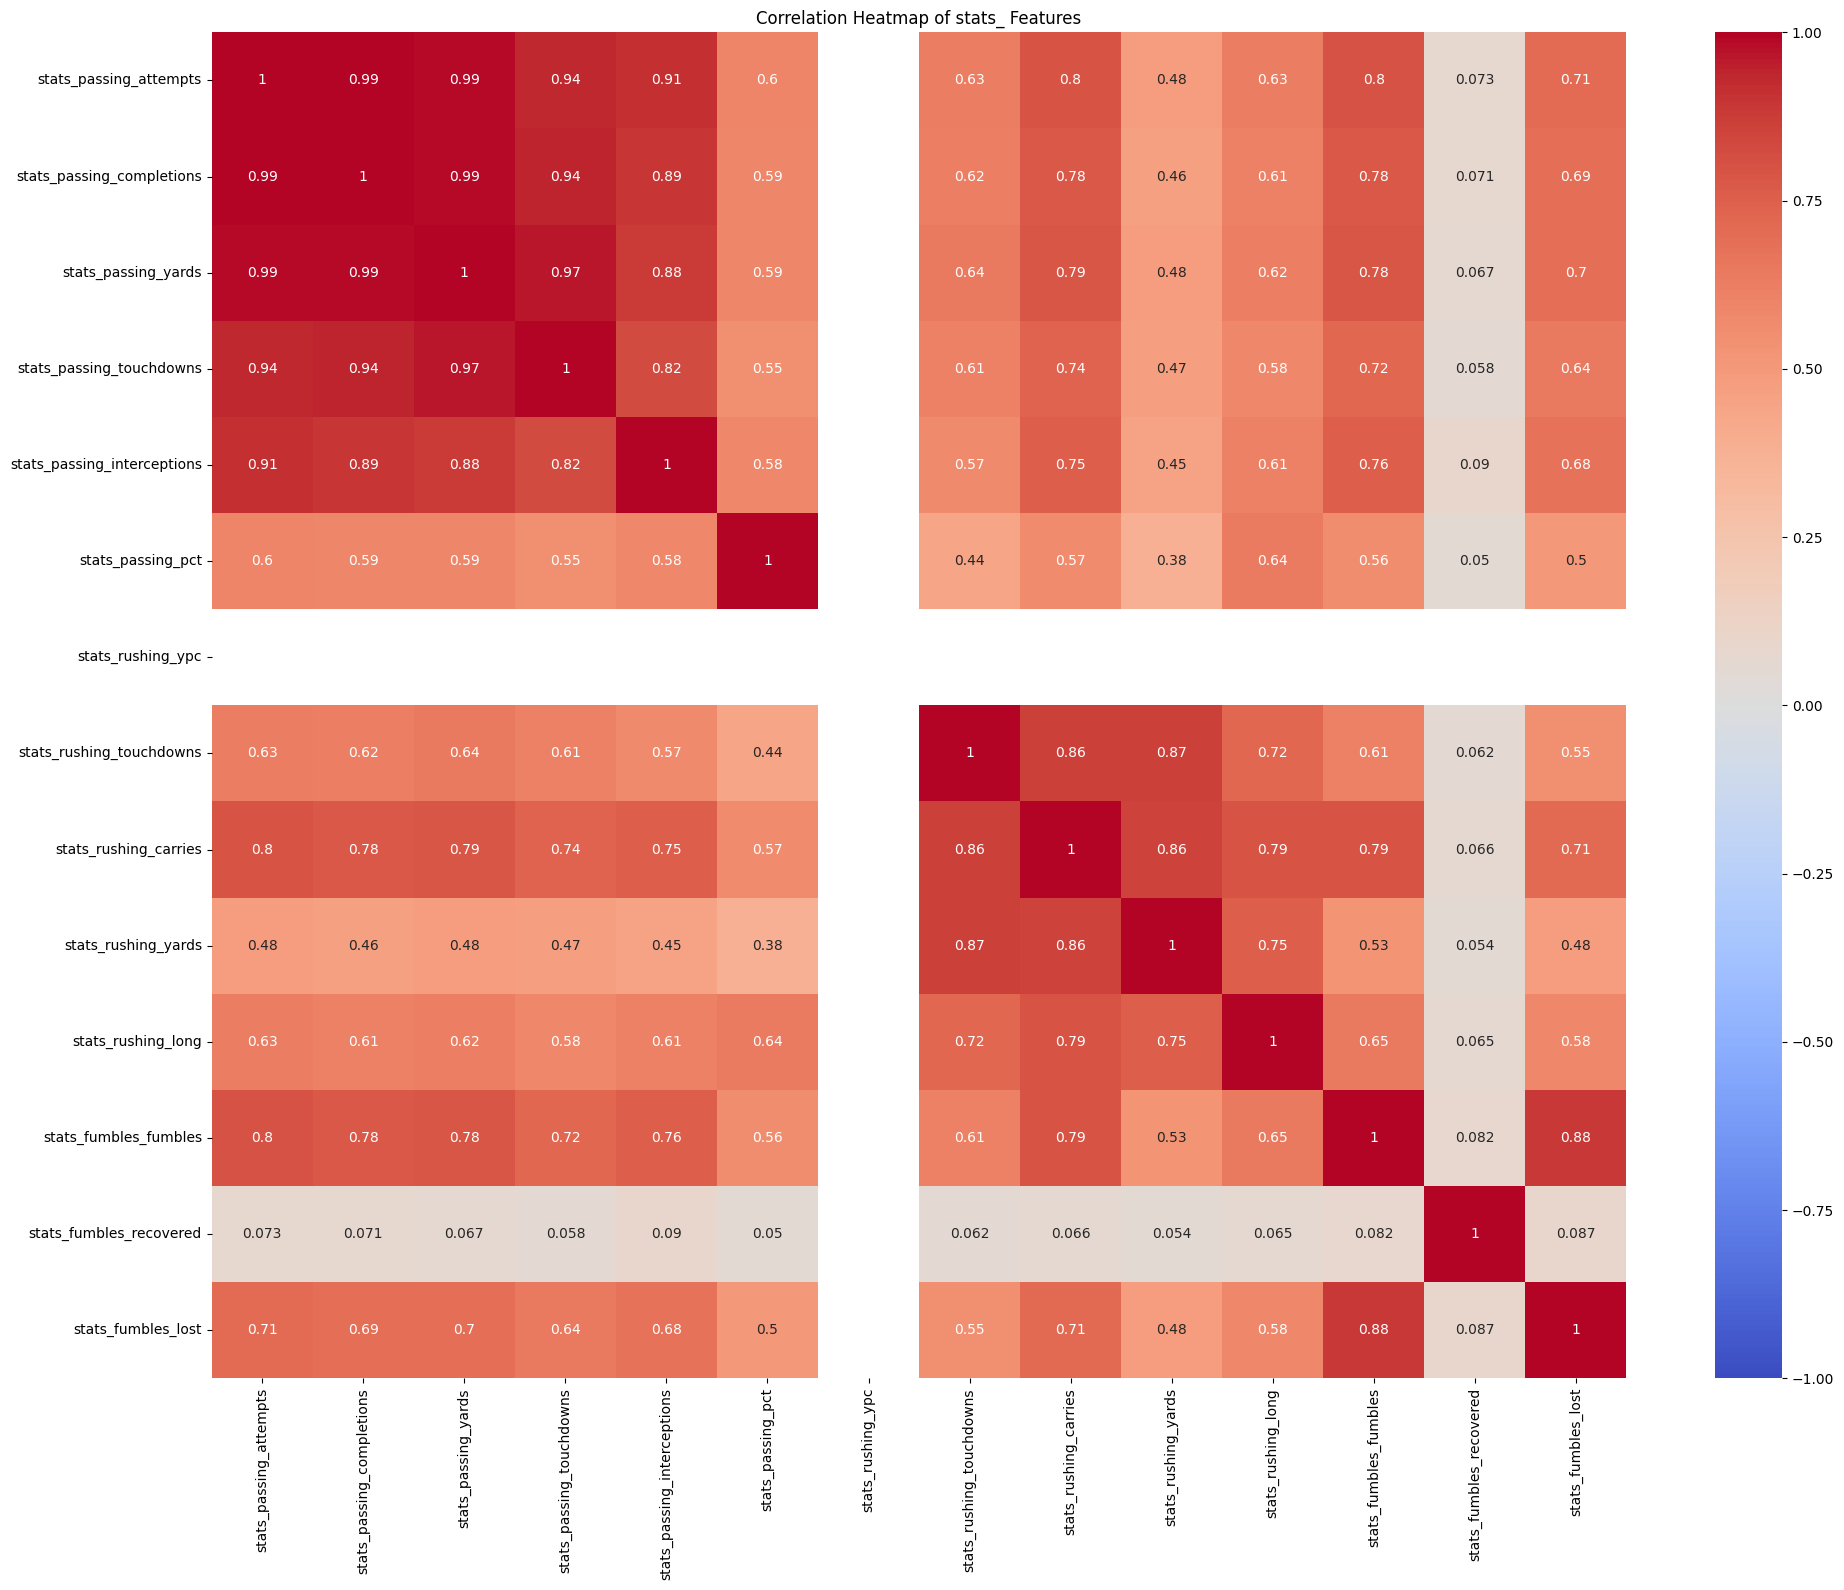

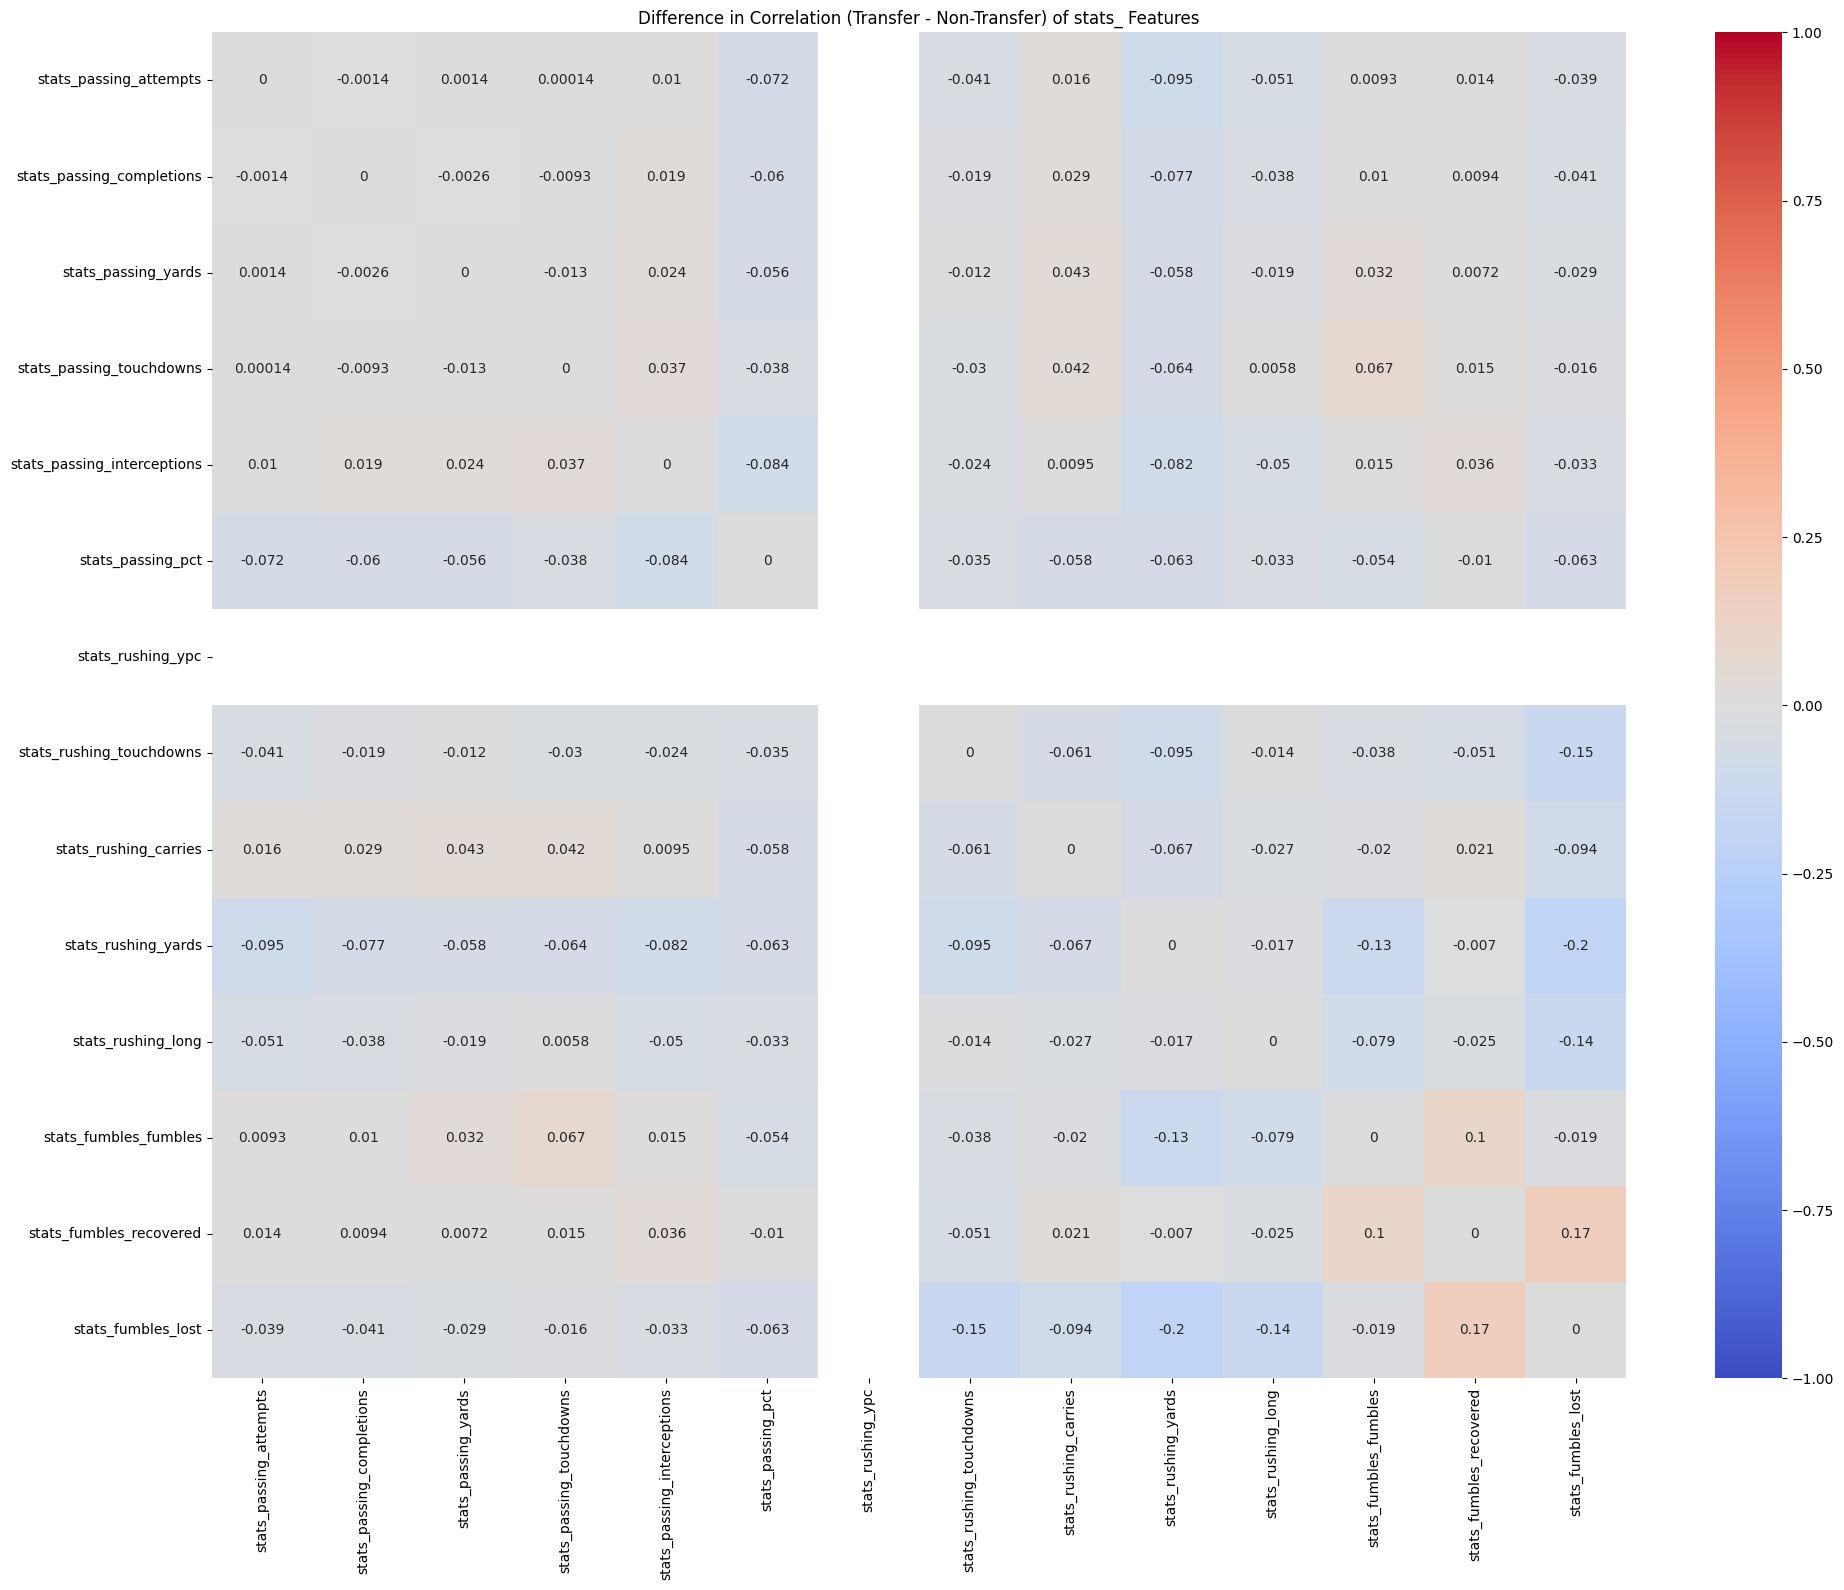

r:\Projects\Athletic Department\Prototypes\CFBD-Transfer-Predictions\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
r:\Projects\Athletic Department\Prototypes\CFBD-Transfer-Predictions\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


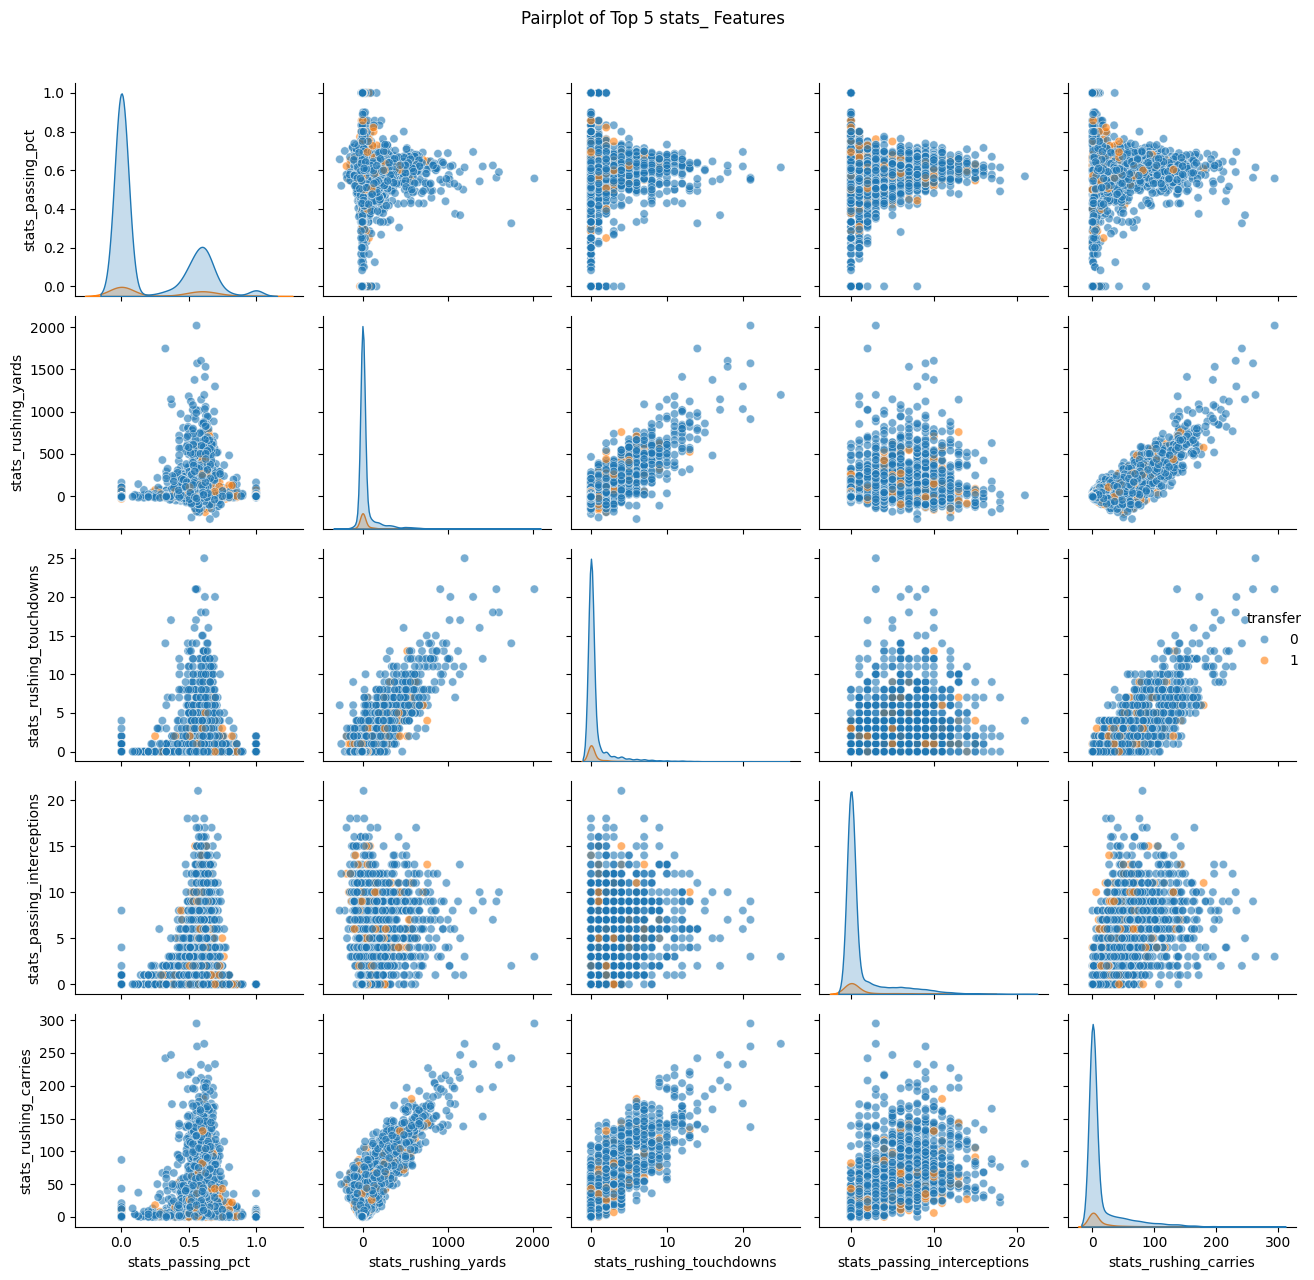

In [6]:

def plot_correlation_heatmap(data, feature_prefix='stats_'):
    # Filter columns with the given prefix
    features = data.filter(like=feature_prefix)
    
    # Calculate the correlation matrix
    corr_matrix = features.corr()
    
    # Set up the matplotlib figure
    plt.figure(figsize=(20, 16))
    
    # Create a heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    
    plt.title(f'Correlation Heatmap of {feature_prefix} Features')
    plt.tight_layout()
    plt.show()

def plot_transfer_correlation_difference(data, feature_prefix='stats_'):
    # Filter columns with the given prefix
    features = data.filter(like=feature_prefix)
    
    # Calculate correlation matrices for each group
    corr_transfer = features[data['transfer'] == 1].corr()
    corr_non_transfer = features[data['transfer'] == 0].corr()
    
    # Calculate the difference
    corr_diff = corr_transfer - corr_non_transfer
    
    # Set up the matplotlib figure
    plt.figure(figsize=(20, 16))
    
    # Create a heatmap of the difference
    sns.heatmap(corr_diff, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    
    plt.title(f'Difference in Correlation (Transfer - Non-Transfer) of {feature_prefix} Features')
    plt.tight_layout()
    plt.show()

def plot_pairplot(data, feature_prefix='stats_', n_features=5):
    # Filter columns with the given prefix
    features = data.filter(like=feature_prefix)
    
    # Select top n features based on correlation with 'transfer'
    top_features = abs(features.corrwith(data['transfer'])).nlargest(n_features).index.tolist()
    
    # Create a DataFrame with top features and transfer status
    plot_data = pd.concat([features[top_features], data['transfer']], axis=1)
    
    # Create the pairplot
    sns.pairplot(plot_data, hue='transfer', diag_kind='kde', plot_kws={'alpha': 0.6})
    
    plt.suptitle(f'Pairplot of Top {n_features} {feature_prefix} Features', y=1.02)
    plt.tight_layout()
    plt.show()

# Generate the plots
plot_correlation_heatmap(data)
plot_transfer_correlation_difference(data)
plot_pairplot(data, n_features=5)

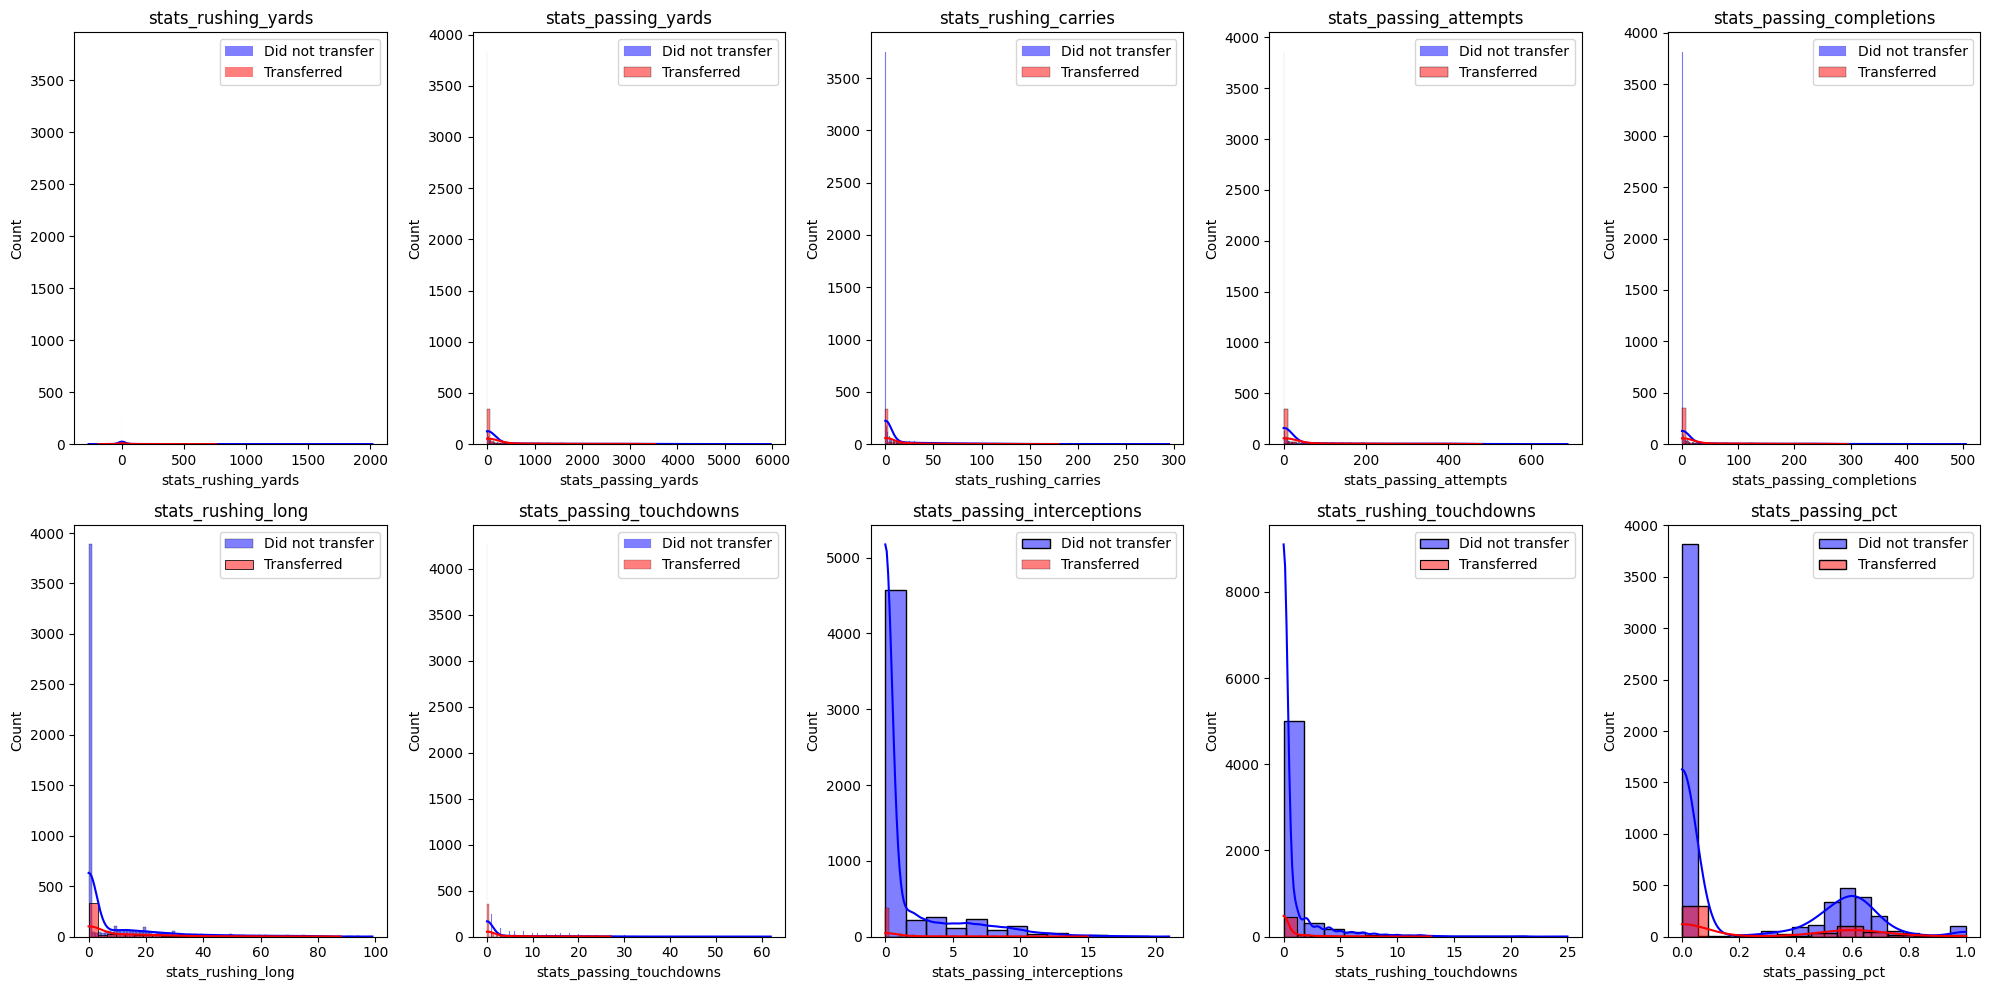

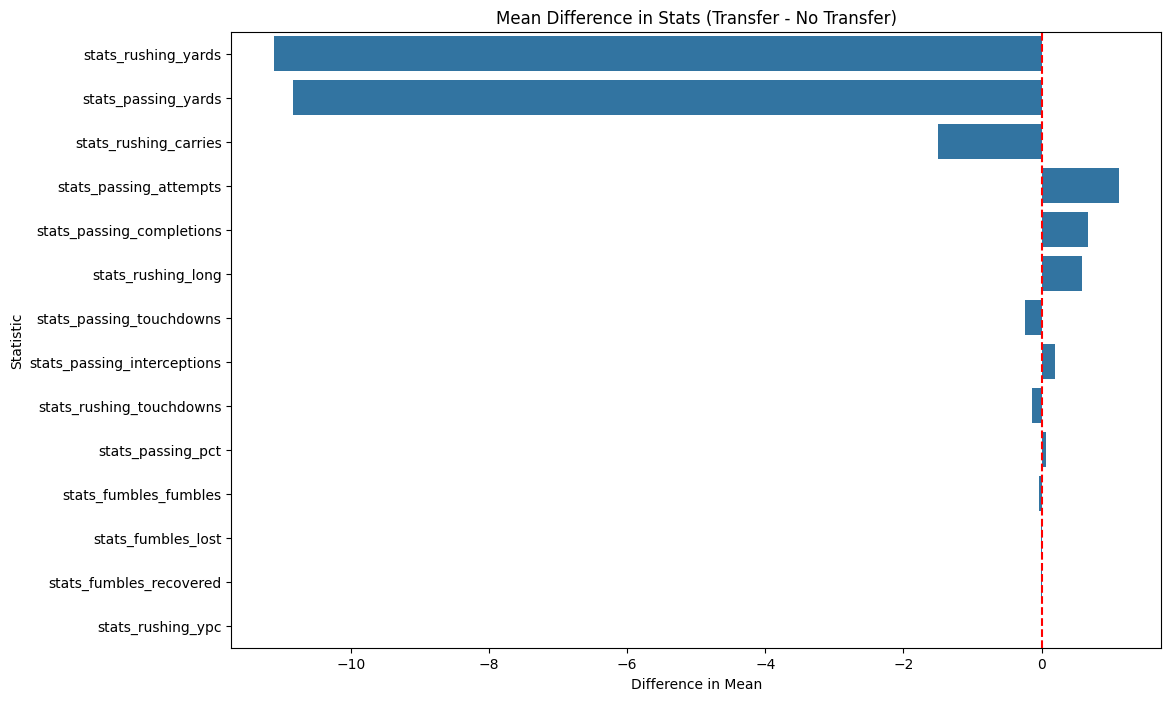

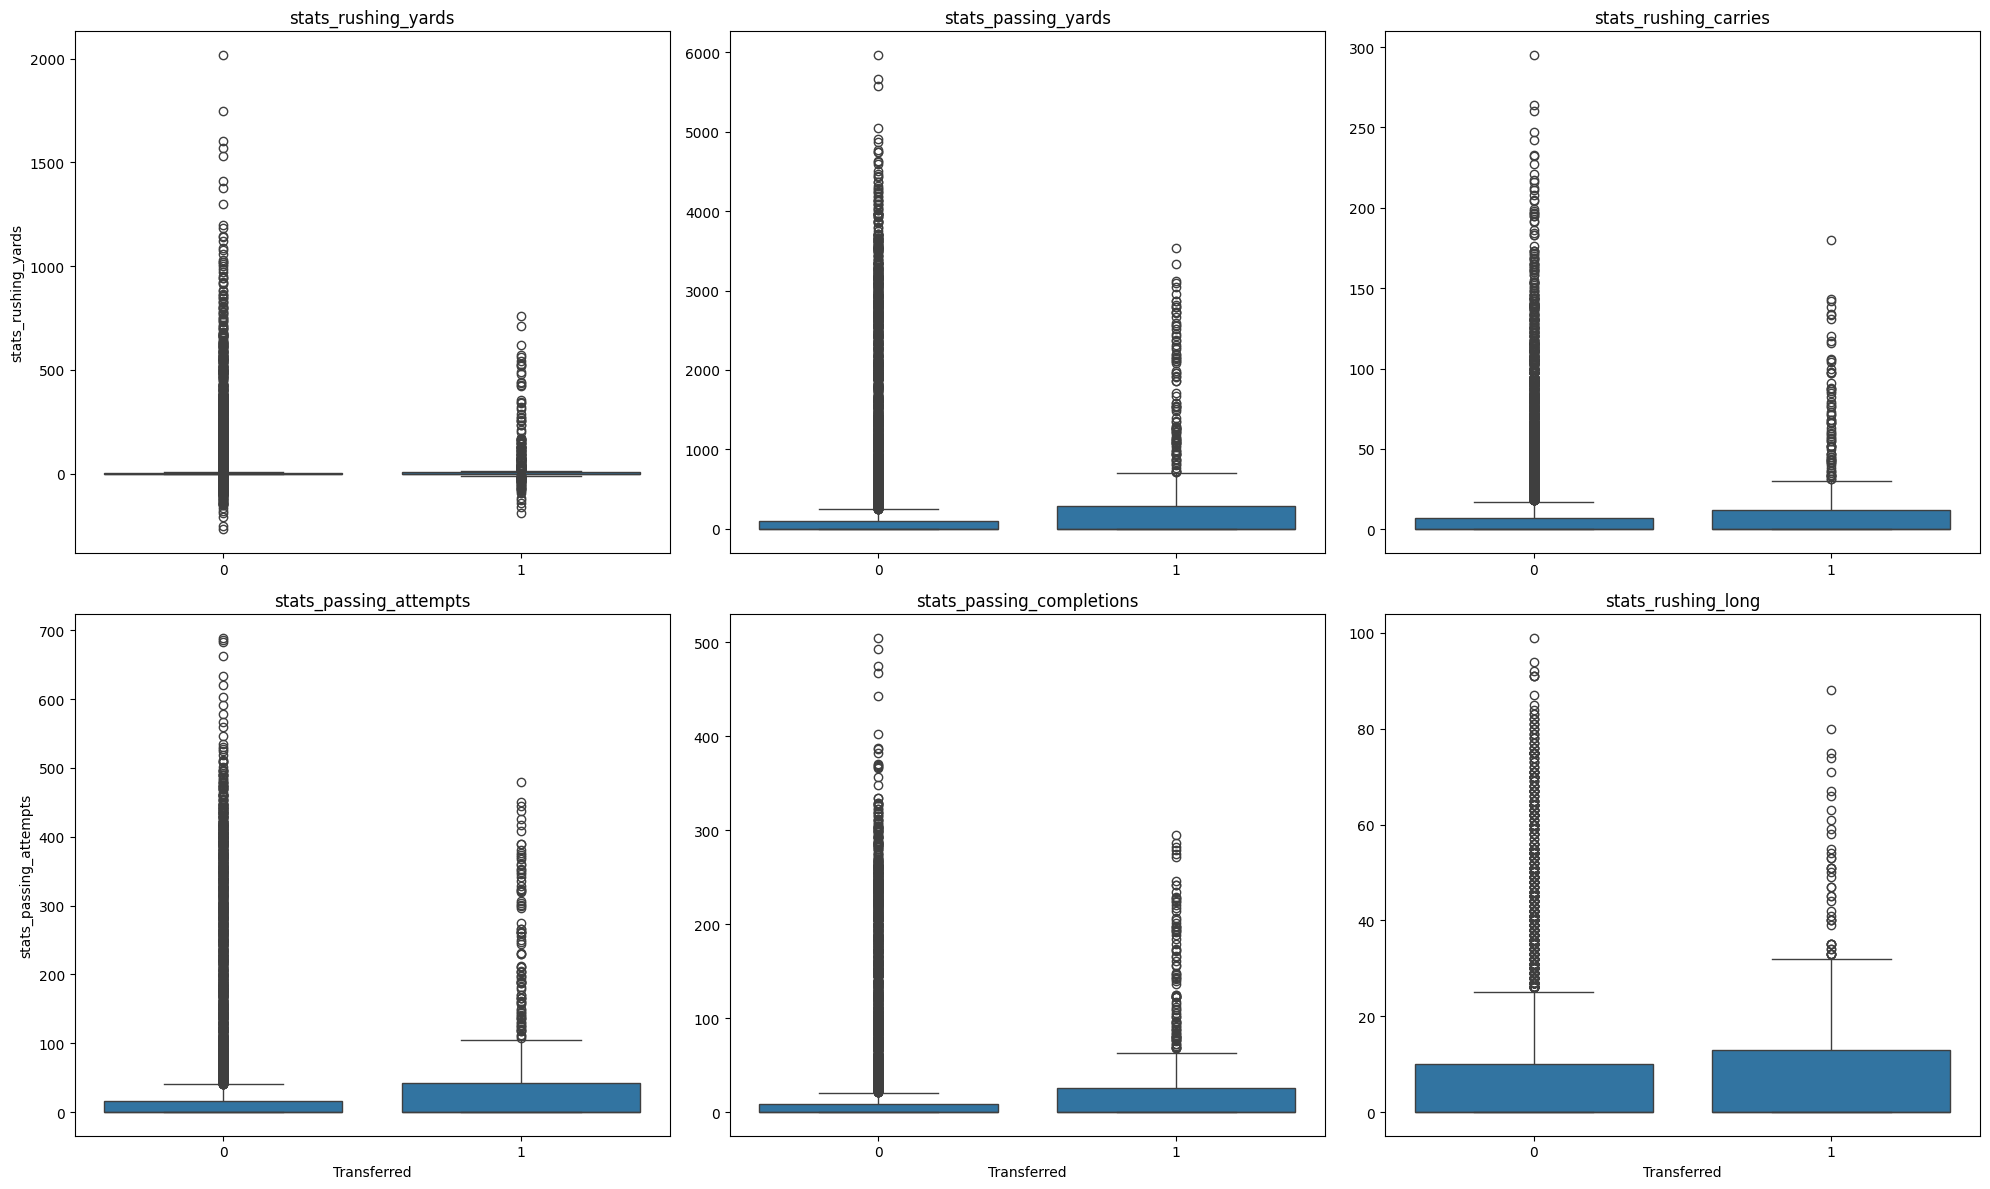

In [7]:

def plot_stat_distributions(stats_diff, top_n=10):
    # Select top N features based on absolute mean difference
    top_features = stats_diff.sort_values('mean diff', key=abs, ascending=False).head(top_n)

    # Set up the matplotlib figure
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
    axes = axes.flatten()

    for i, (feature, row) in enumerate(top_features.iterrows()):
        ax = axes[i]
        
        # Plot histogram for non-transferring players
        sns.histplot(data[data['transfer'] == 0][feature], 
                     kde=True, color='blue', alpha=0.5, 
                     label='Did not transfer', ax=ax)
        
        # Plot histogram for transferring players
        sns.histplot(data[data['transfer'] == 1][feature], 
                     kde=True, color='red', alpha=0.5, 
                     label='Transferred', ax=ax)
        
        ax.set_title(feature)
        ax.legend()

    plt.tight_layout()
    plt.show()

def plot_mean_differences(stats_diff, top_n=15):
    # Select top N features based on absolute mean difference
    top_features = stats_diff.sort_values('mean diff', key=abs, ascending=False).head(top_n)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_features['mean diff'], y=top_features.index)
    plt.title('Mean Difference in Stats (Transfer - No Transfer)')
    plt.xlabel('Difference in Mean')
    plt.ylabel('Statistic')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.show()

def plot_boxplots(data, stats_diff, top_n=6):
    # Select top N features based on absolute mean difference
    top_features = stats_diff.sort_values('mean diff', key=abs, ascending=False).head(top_n)

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
    axes = axes.flatten()

    for i, feature in enumerate(top_features.index):
        ax = axes[i]
        sns.boxplot(x='transfer', y=feature, data=data, ax=ax)
        ax.set_title(feature)
        ax.set_xlabel('Transferred' if i >= 3 else '')
        ax.set_ylabel(feature if i % 3 == 0 else '')

    plt.tight_layout()
    plt.show()

# Generate the plots
plot_stat_distributions(stats_diff)
plot_mean_differences(stats_diff)
plot_boxplots(data, stats_diff)

                     did not transfer mean  did transfer mean  \
usage_pass                     -606.677019        -443.809451   
usage_passingDowns             -606.715376        -443.859303   
usage_thirdDown                -606.711661        -443.855591   
usage_overall                  -606.737480        -443.888045   
usage_secondDown               -606.738329        -443.890887   
usage_firstDown                -606.748384        -443.901448   
usage_standardDowns            -606.747011        -443.902593   
usage_rush                     -606.791338        -443.964643   

                     did not transfer std  did transfer std  \
usage_pass                     488.057132        497.045841   
usage_passingDowns             488.009388        497.001178   
usage_thirdDown                488.014011        497.004503   
usage_overall                  487.981878        496.975433   
usage_secondDown               487.980822        496.972887   
usage_firstDown                487.9

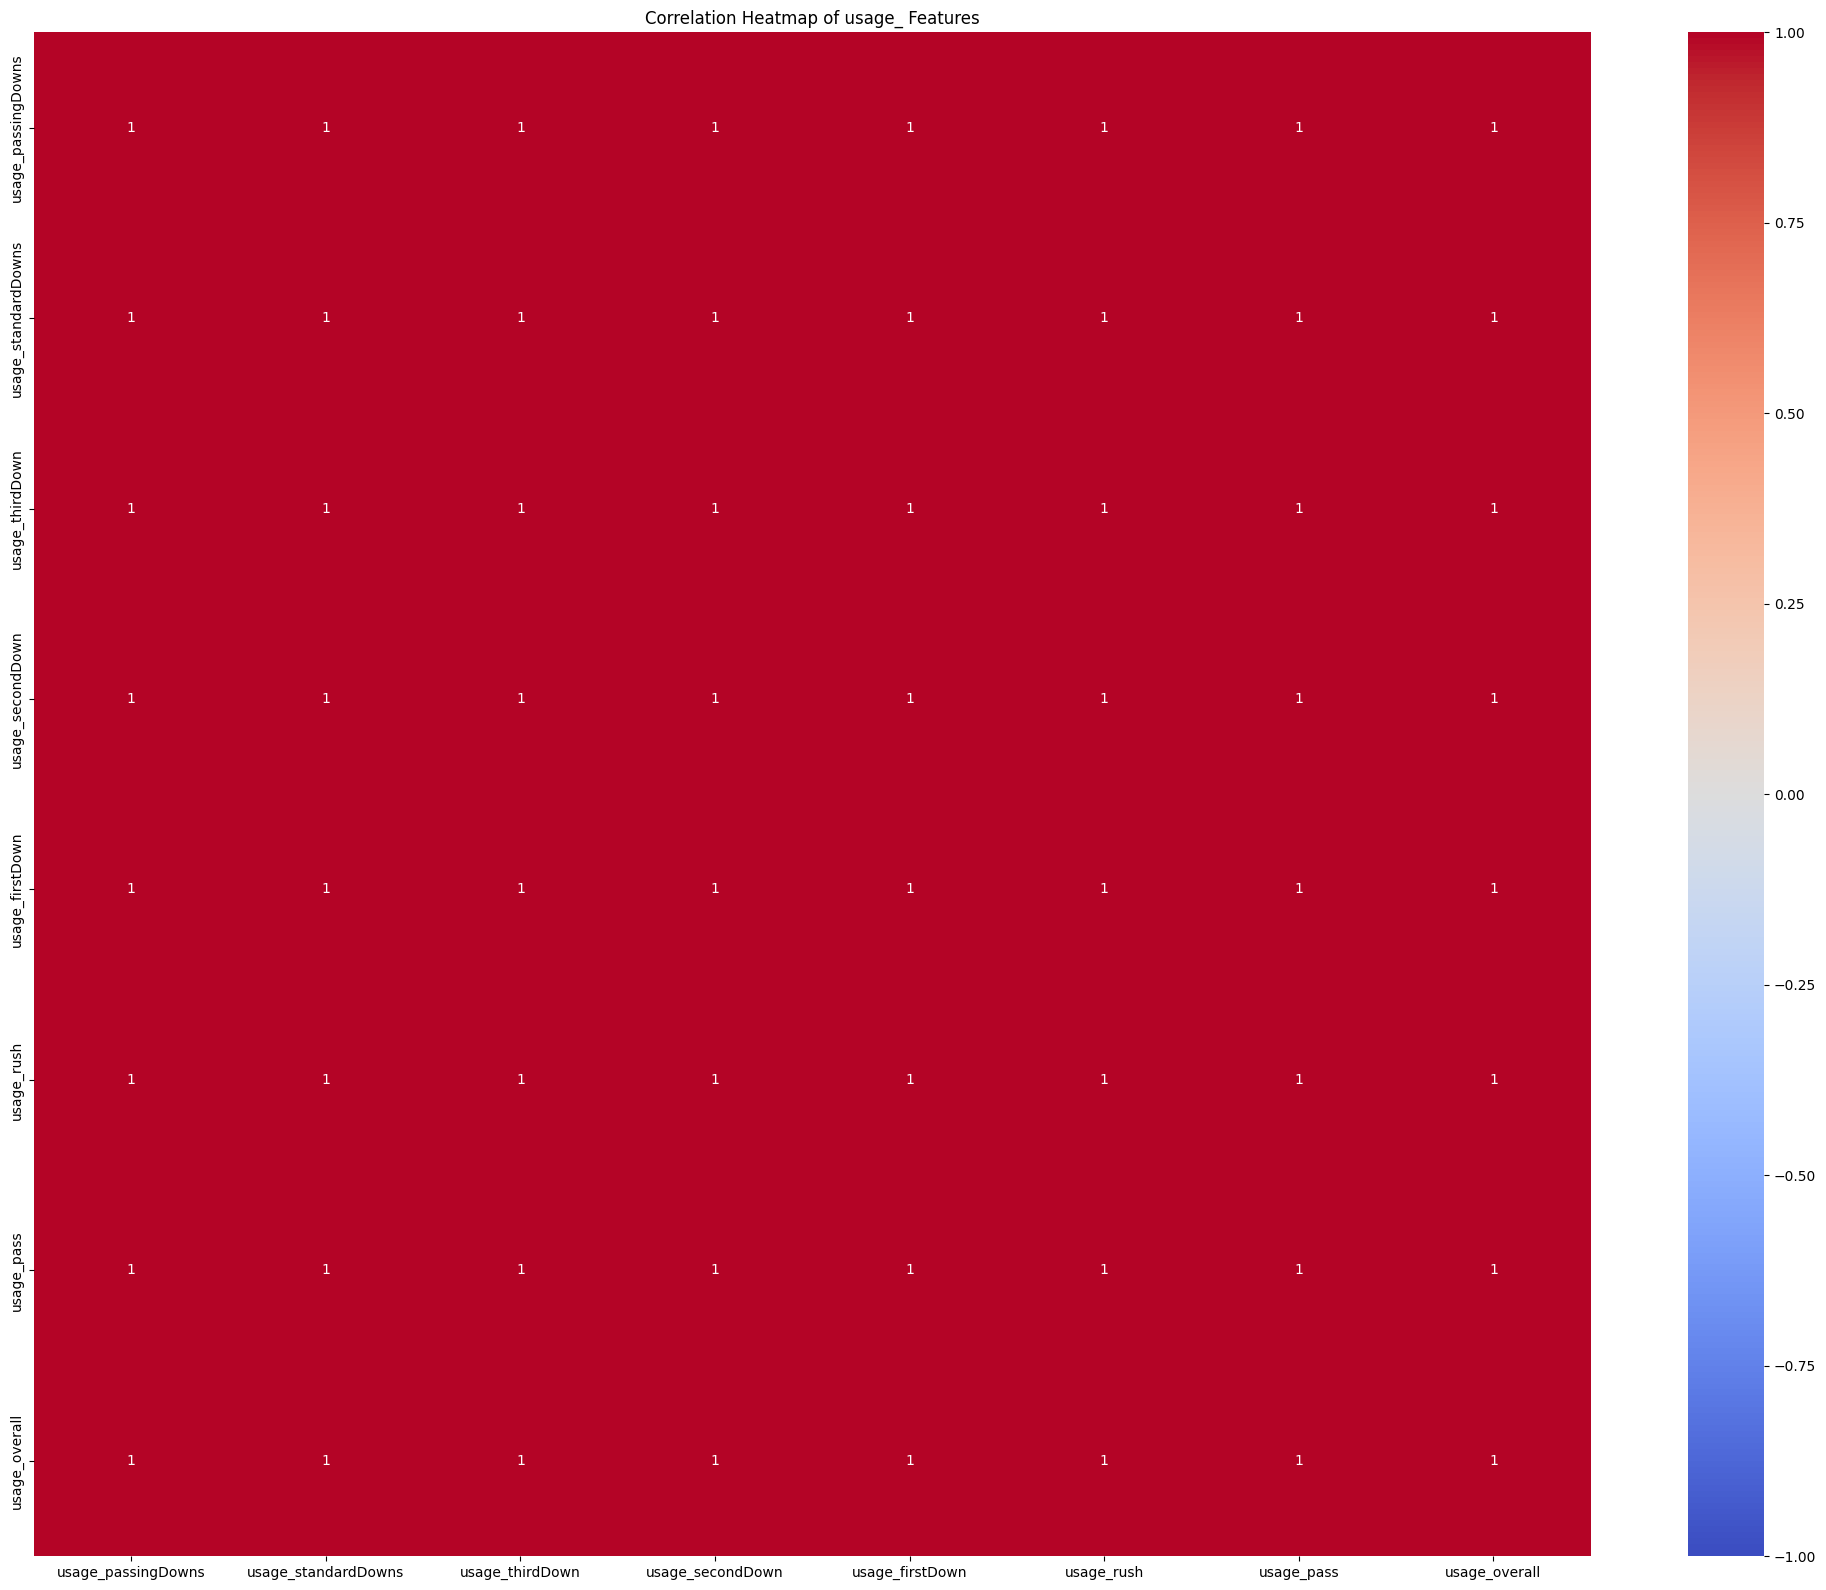

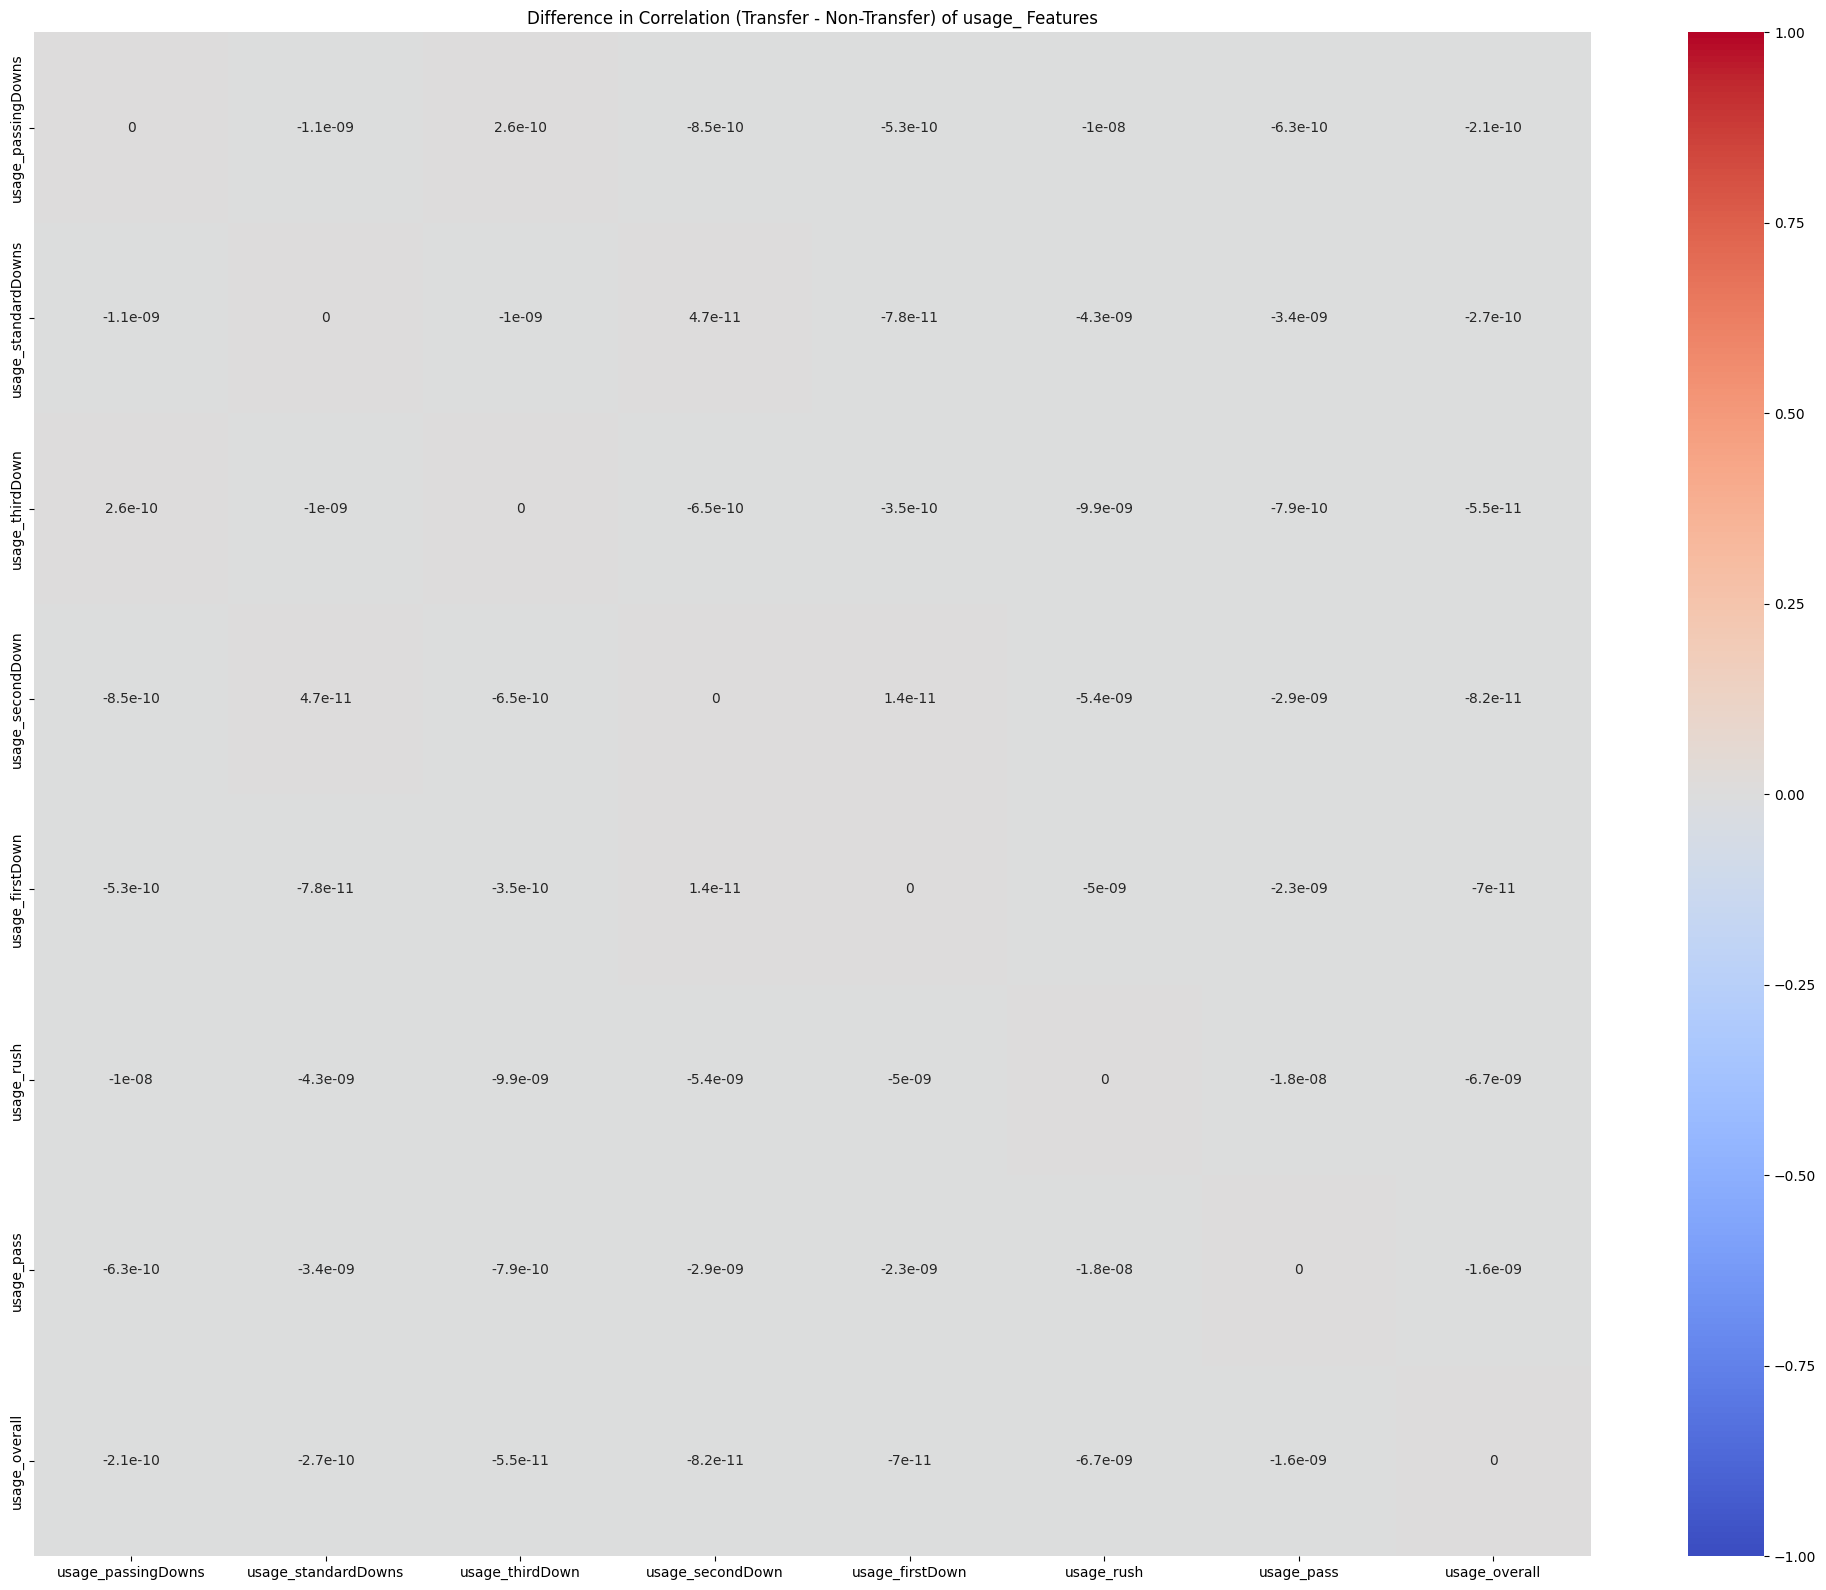

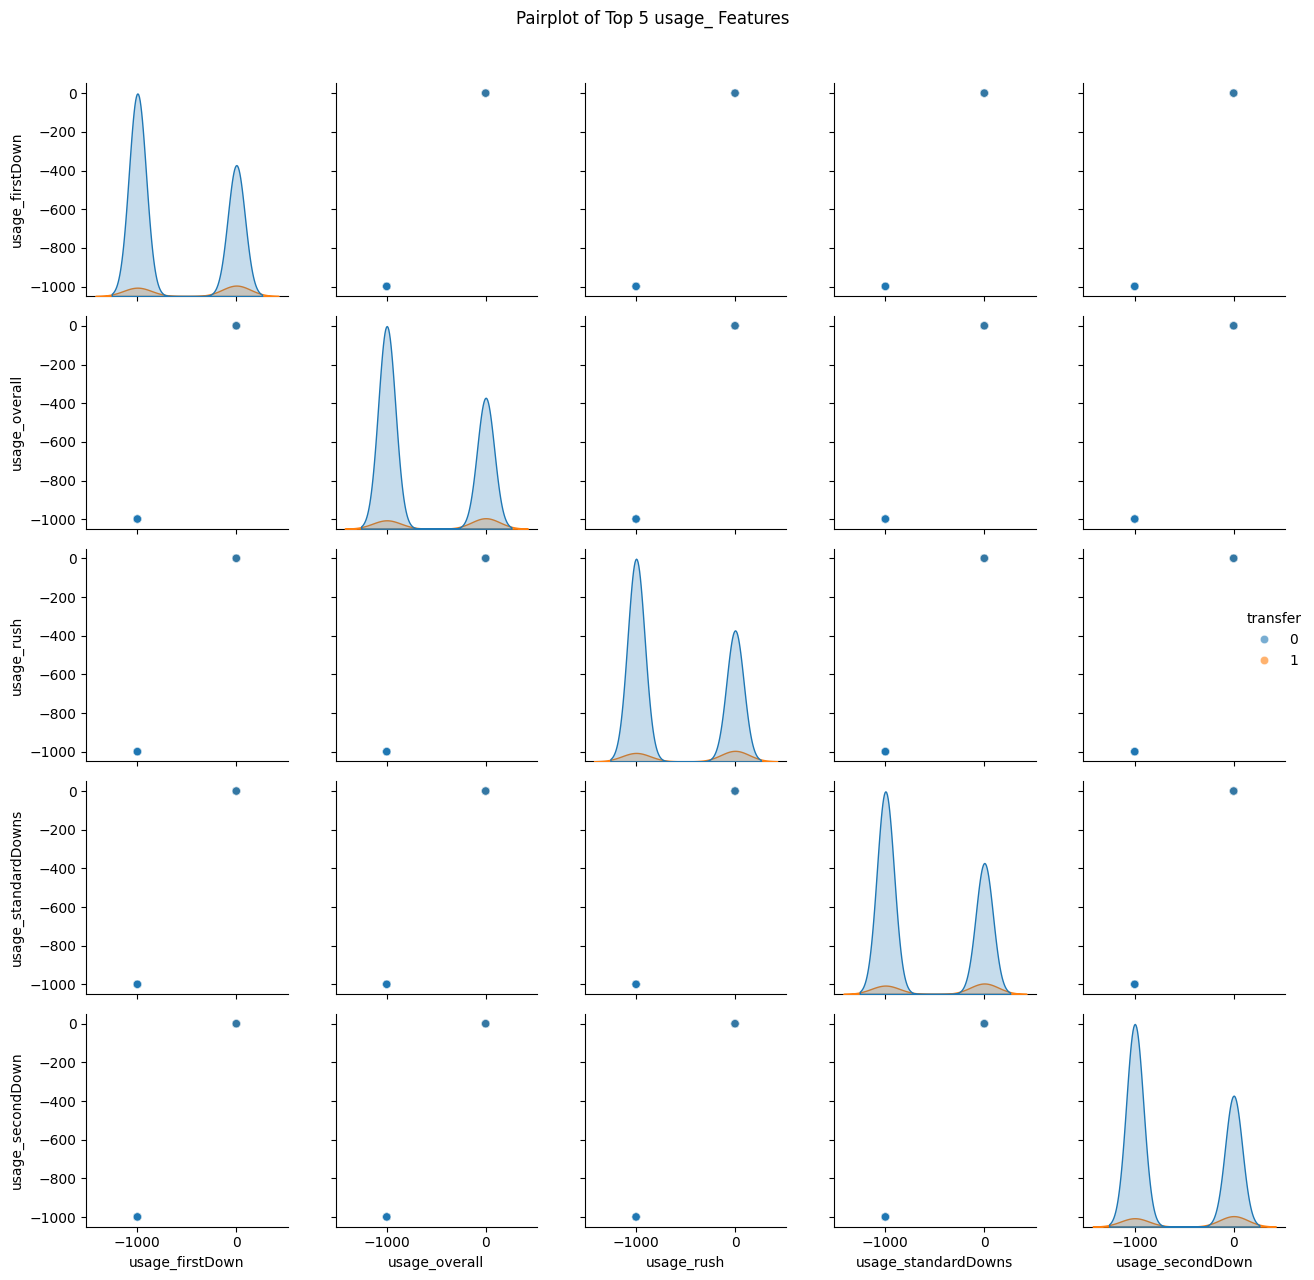

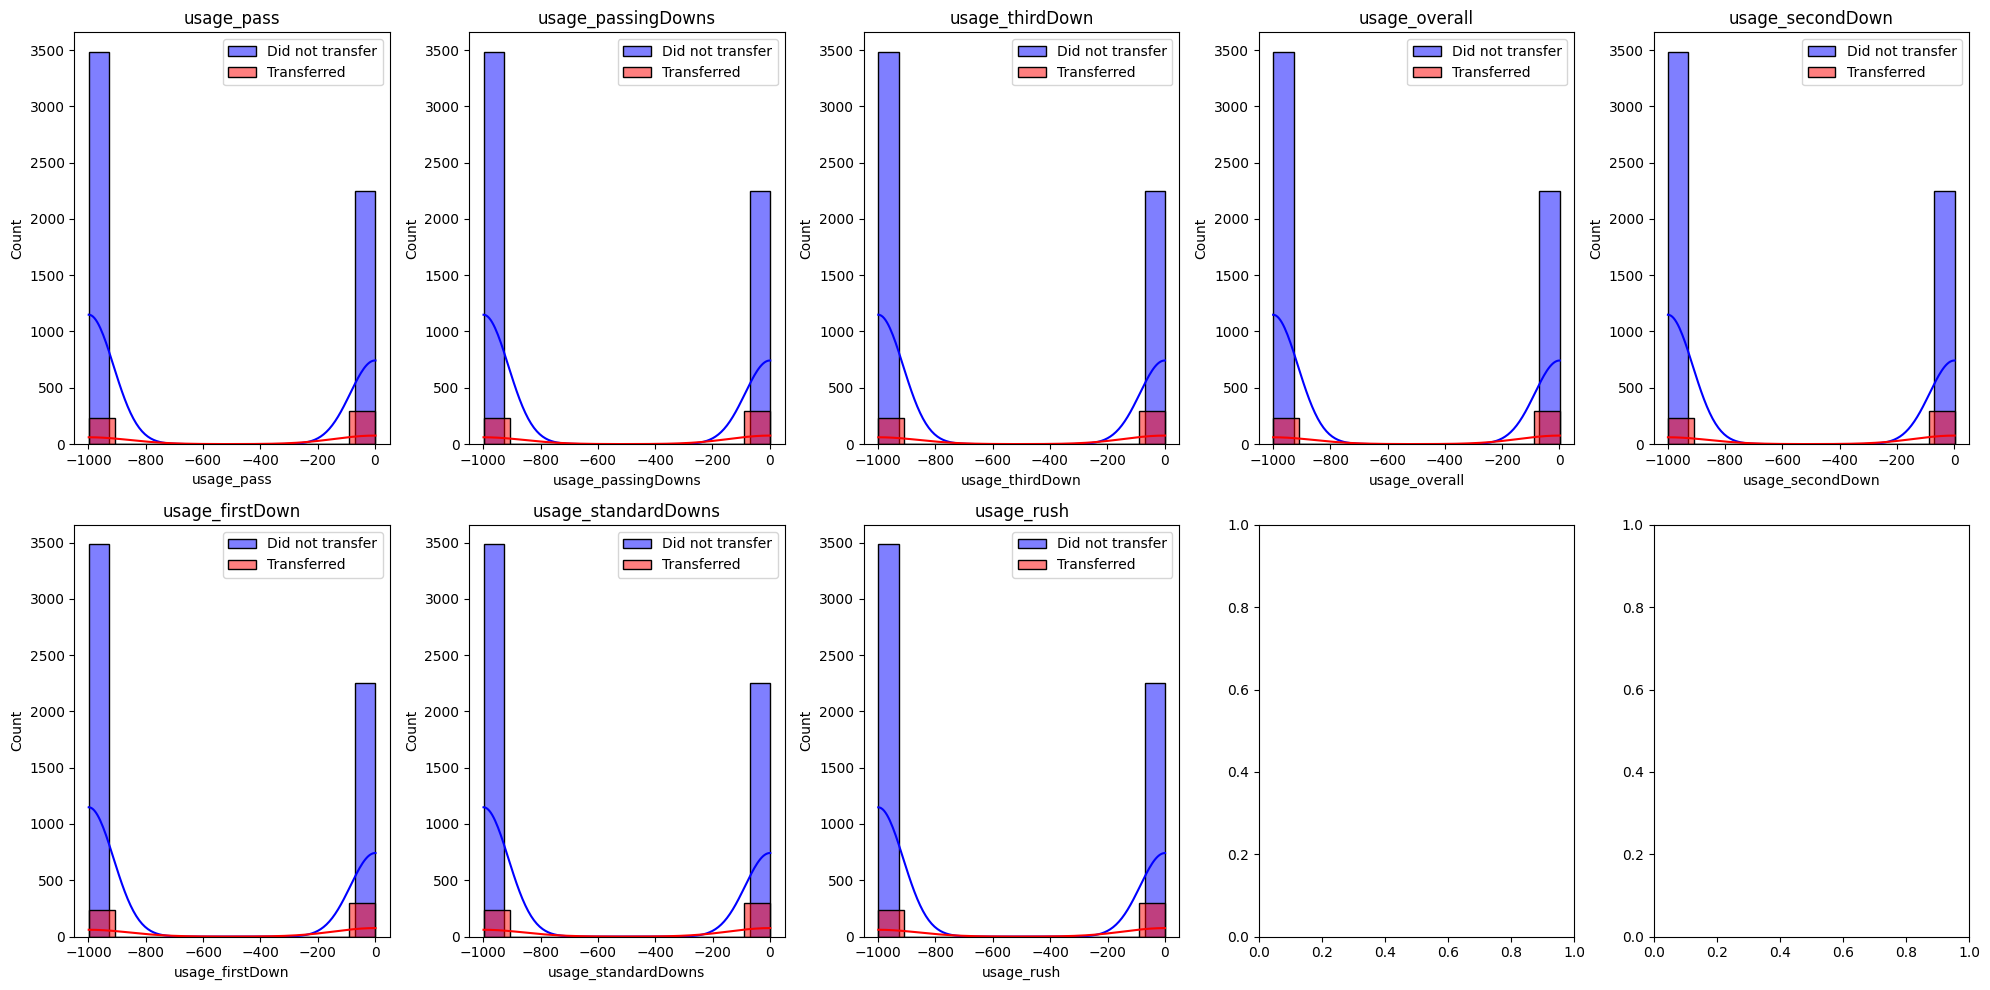

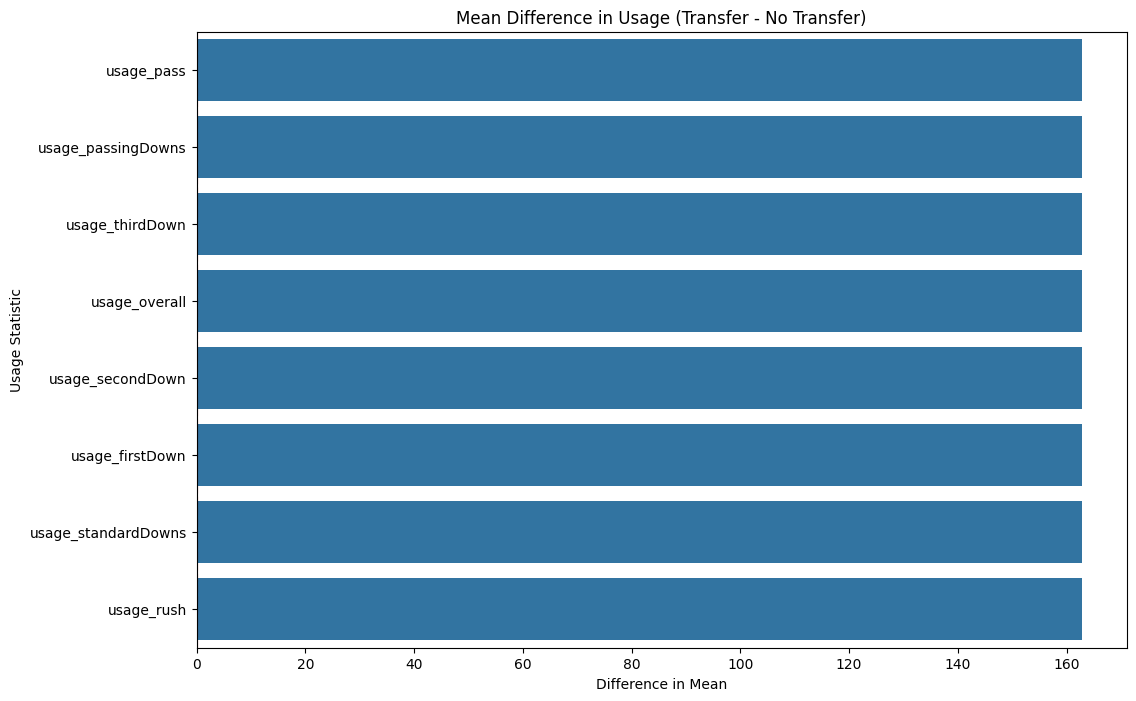

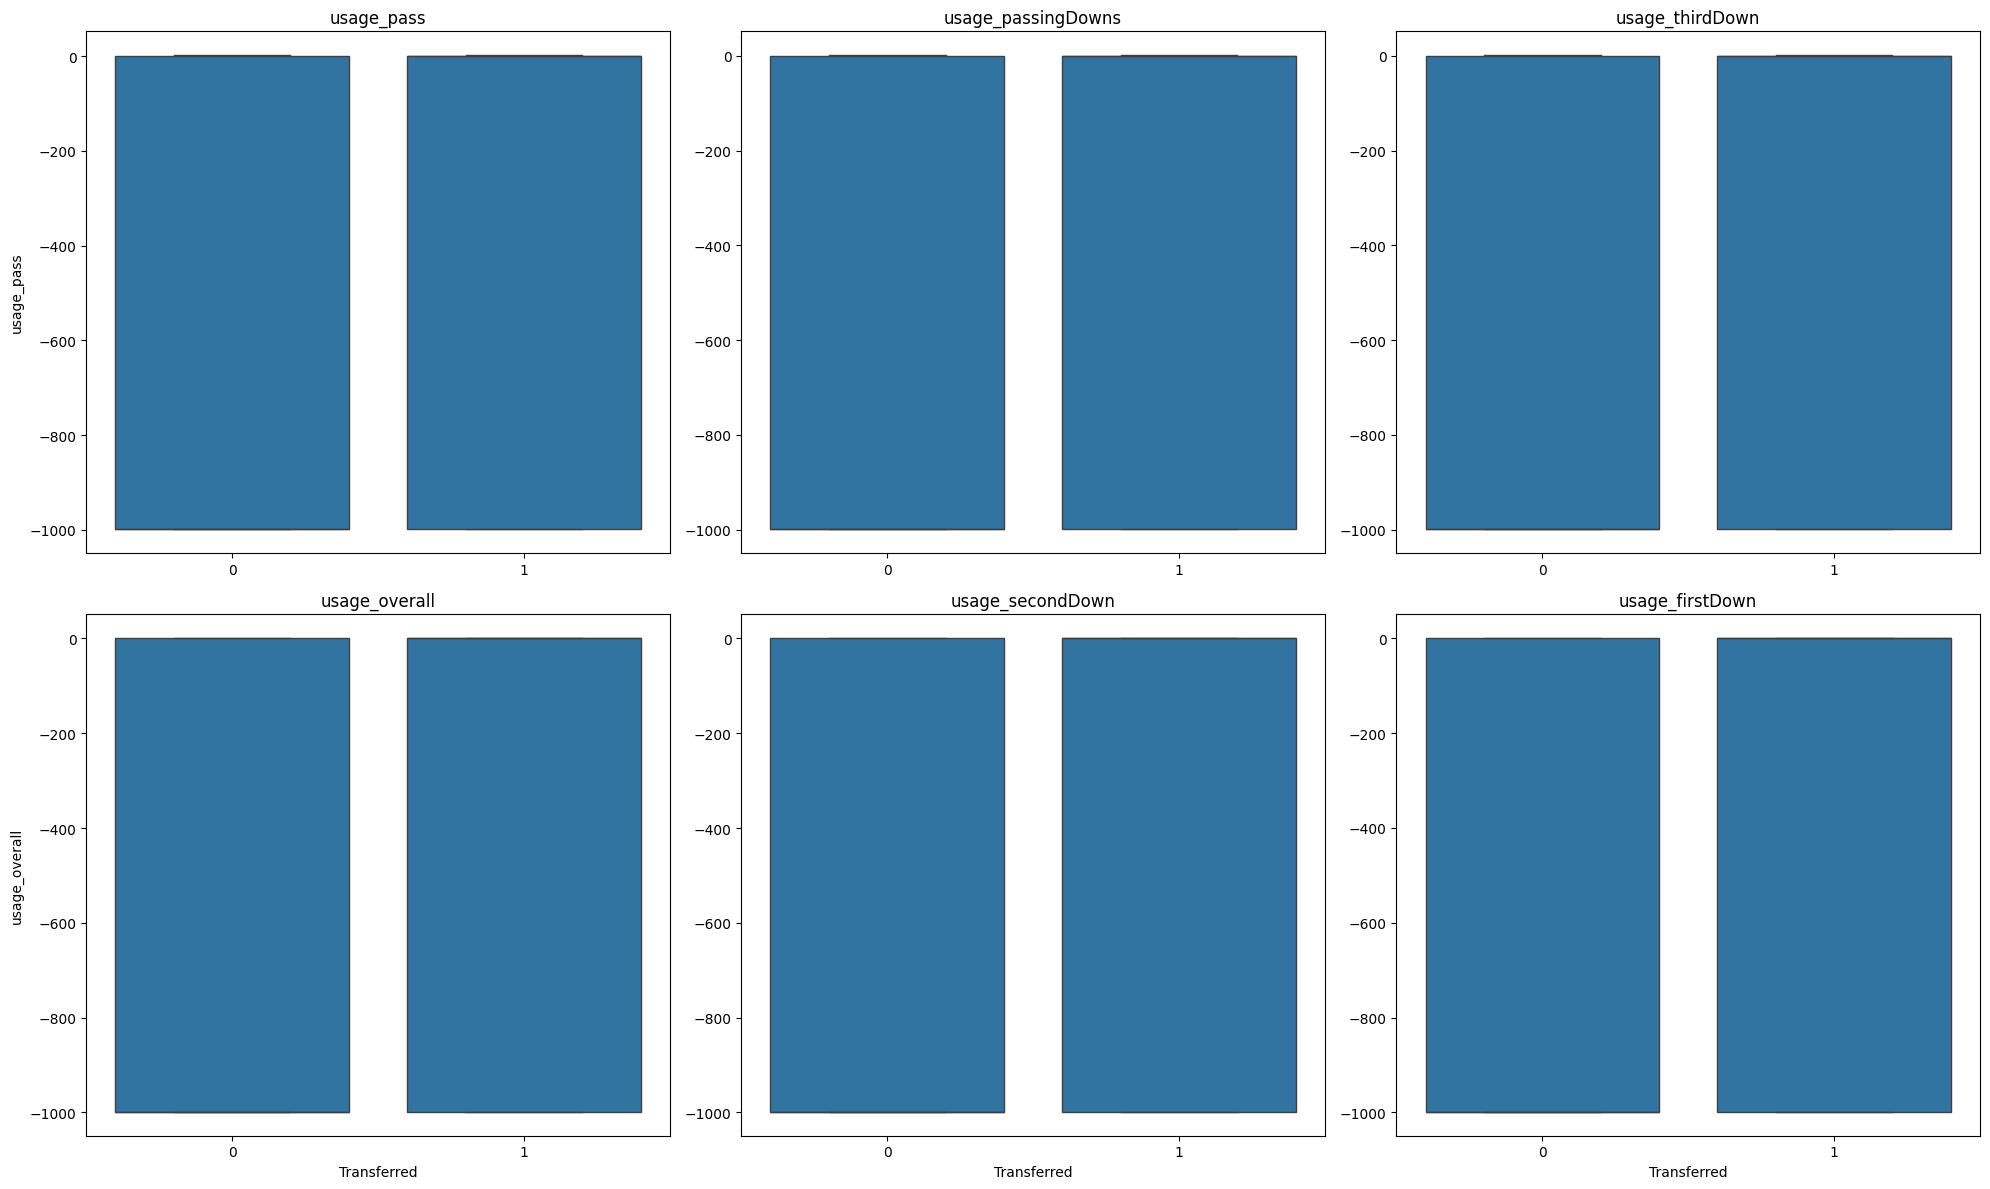

In [8]:


# Filter columns with usage_ prefix
usage = data.filter(like='usage_')

# Calculate statistics for transfer == 0
usage_0_mean = usage[data['transfer'] == 0].mean()
usage_0_median = usage[data['transfer'] == 0].median()
usage_0_std = usage[data['transfer'] == 0].std()
usage_0_min = usage[data['transfer'] == 0].min()
usage_0_max = usage[data['transfer'] == 0].max()

# Calculate statistics for transfer == 1
usage_1_mean = usage[data['transfer'] == 1].mean()
usage_1_median = usage[data['transfer'] == 1].median()
usage_1_std = usage[data['transfer'] == 1].std()
usage_1_min = usage[data['transfer'] == 1].min()
usage_1_max = usage[data['transfer'] == 1].max()

# Create a new DataFrame with these statistics
usage_diff = pd.DataFrame({
    'did not transfer mean': usage_0_mean,
    'did transfer mean': usage_1_mean,
    'did not transfer std': usage_0_std,
    'did transfer std': usage_1_std,
    'did not transfer min': usage_0_min,
    'did transfer min': usage_1_min,
    'did not transfer max': usage_0_max,
    'did transfer max': usage_1_max
})

# Calculate the difference between the two groups for each statistic
usage_diff['mean diff'] = usage_diff['did transfer mean'] - usage_diff['did not transfer mean']
usage_diff['std diff'] = usage_diff['did transfer std'] - usage_diff['did not transfer std']
usage_diff['min diff'] = usage_diff['did transfer min'] - usage_diff['did not transfer min']
usage_diff['max diff'] = usage_diff['did transfer max'] - usage_diff['did not transfer max']

# Sort by the mean difference
usage_diff = usage_diff.sort_values('mean diff', ascending=False)

# Display the top 20 rows
print(usage_diff.head(20))

def plot_correlation_heatmap(data, feature_prefix='usage_'):
    features = data.filter(like=feature_prefix)
    corr_matrix = features.corr()
    plt.figure(figsize=(20, 16))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'Correlation Heatmap of {feature_prefix} Features')
    plt.tight_layout()
    plt.show()

def plot_transfer_correlation_difference(data, feature_prefix='usage_'):
    features = data.filter(like=feature_prefix)
    corr_transfer = features[data['transfer'] == 1].corr()
    corr_non_transfer = features[data['transfer'] == 0].corr()
    corr_diff = corr_transfer - corr_non_transfer
    plt.figure(figsize=(20, 16))
    sns.heatmap(corr_diff, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
    plt.title(f'Difference in Correlation (Transfer - Non-Transfer) of {feature_prefix} Features')
    plt.tight_layout()
    plt.show()

def plot_pairplot(data, feature_prefix='usage_', n_features=5):
    features = data.filter(like=feature_prefix)
    top_features = abs(features.corrwith(data['transfer'])).nlargest(n_features).index.tolist()
    plot_data = pd.concat([features[top_features], data['transfer']], axis=1)
    sns.pairplot(plot_data, hue='transfer', diag_kind='kde', plot_kws={'alpha': 0.6})
    plt.suptitle(f'Pairplot of Top {n_features} {feature_prefix} Features', y=1.02)
    plt.tight_layout()
    plt.show()

def plot_usage_distributions(usage_diff, top_n=10):
    top_features = usage_diff.sort_values('mean diff', key=abs, ascending=False).head(top_n)
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))
    axes = axes.flatten()
    for i, (feature, row) in enumerate(top_features.iterrows()):
        ax = axes[i]
        sns.histplot(data[data['transfer'] == 0][feature], 
                     kde=True, color='blue', alpha=0.5, 
                     label='Did not transfer', ax=ax)
        sns.histplot(data[data['transfer'] == 1][feature], 
                     kde=True, color='red', alpha=0.5, 
                     label='Transferred', ax=ax)
        ax.set_title(feature)
        ax.legend()
    plt.tight_layout()
    plt.show()

def plot_mean_differences(usage_diff, top_n=15):
    top_features = usage_diff.sort_values('mean diff', key=abs, ascending=False).head(top_n)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_features['mean diff'], y=top_features.index)
    plt.title('Mean Difference in Usage (Transfer - No Transfer)')
    plt.xlabel('Difference in Mean')
    plt.ylabel('Usage Statistic')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.show()

def plot_boxplots(data, usage_diff, top_n=6):
    top_features = usage_diff.sort_values('mean diff', key=abs, ascending=False).head(top_n)
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))
    axes = axes.flatten()
    for i, feature in enumerate(top_features.index):
        ax = axes[i]
        sns.boxplot(x='transfer', y=feature, data=data, ax=ax)
        ax.set_title(feature)
        ax.set_xlabel('Transferred' if i >= 3 else '')
        ax.set_ylabel(feature if i % 3 == 0 else '')
    plt.tight_layout()
    plt.show()

# Generate the plots
plot_correlation_heatmap(data)
plot_transfer_correlation_difference(data)
plot_pairplot(data, n_features=5)
plot_usage_distributions(usage_diff)
plot_mean_differences(usage_diff)
plot_boxplots(data, usage_diff)